# Goal Statement : predict the driving range (km) of an electric vehicle using its specifications.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Sql\Ev_spec_2025.csv")
df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [4]:
df.describe()
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [5]:
df=df.dropna()
df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
6,Alfa,Romeo Junior Elettrica 54 kWh,150,50.8,Lithium-ion,102.0,260.0,128,320,9.0,...,0.0,400,5,FWD,JB - Compact,4173,1781,1532,SUV,https://ev-database.org/car/2184/Alfa-Romeo-Ju...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Volvo,EX90 Twin Motor (MY24-26),180,107.0,Lithium-ion,204.0,770.0,188,470,5.9,...,2200.0,310,7,AWD,JF - Luxury,5037,1964,1744,SUV,https://ev-database.org/car/1775/Volvo-EX90-Tw...
457,Volvo,EX90 Twin Motor Performance (MY24-26),180,107.0,Lithium-ion,204.0,910.0,188,455,4.9,...,2200.0,310,7,AWD,JF - Luxury,5037,1964,1744,SUV,https://ev-database.org/car/1776/Volvo-EX90-Tw...
468,Zeekr,001 Long Range RWD,200,94.0,Lithium-ion,110.0,343.0,152,505,7.2,...,1500.0,539,5,RWD,E - Executive,4955,1999,1560,Liftback Sedan,https://ev-database.org/car/1933/Zeekr-001-Lon...
469,Zeekr,001 Performance AWD,200,94.0,Lithium-ion,110.0,686.0,159,480,3.8,...,2000.0,539,5,AWD,E - Executive,4955,1999,1560,Liftback Sedan,https://ev-database.org/car/1934/Zeekr-001-Per...


In [6]:
#Dropped some columns
df2 = df.drop(['brand','number_of_cells','model','segment','range_km','source_url','car_body_type','fast_charging_power_kw_dc','cargo_volume_l','drivetrain','fast_charge_port','battery_type','towing_capacity_kg','length_mm','width_mm','height_mm','seats'],axis = 'columns')
df2.head()

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,acceleration_0_100_s
0,155,37.8,235.0,156,7.0
1,155,37.8,235.0,149,7.0
2,200,50.8,345.0,158,5.9
3,200,50.8,345.0,158,6.2
6,150,50.8,260.0,128,9.0


In [7]:
print(df2.isnull().sum())

top_speed_kmh           0
battery_capacity_kWh    0
torque_nm               0
efficiency_wh_per_km    0
acceleration_0_100_s    0
dtype: int64


In [8]:
cols = ['battery_capacity_kWh', 'efficiency_wh_per_km',
        'top_speed_kmh', 'acceleration_0_100_s', 'torque_nm', 'range_km']
df_model = df[cols].copy()
df_model = df_model.dropna()   # simpler: drop rows with missing in these columns
print("After dropna:", df_model.shape)


After dropna: (264, 6)


In [9]:
# usable battery (assume 90% usable) — optional but helps to model real-world usable energy
df_model['usable_battery_kWh'] = df_model['battery_capacity_kWh'] * 0.9

# create a poweriness proxy: speed/accel (lower accel -> slower)
df_model['performance_index'] = df_model['top_speed_kmh'] / (df_model['acceleration_0_100_s'] + 0.1)

# Drop original battery if you prefer usable metric only (optional)
# df_model = df_model.drop(columns=['battery_capacity_kWh'])


In [10]:
X = df_model.drop('range_km', axis=1)
y = df_model['range_km']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("LR R2:", r2_score(y_test, y_pred_lr))
print("LR MAE:", mean_absolute_error(y_test, y_pred_lr))


LR R2: 0.9273836807613394
LR MAE: 21.92539694734769


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RF R2:", r2_score(y_test, y_pred))
print("RF MAE:", mean_absolute_error(y_test, y_pred))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RF R2: 0.9346000514399316
RF MAE: 18.956249999999994
RF RMSE: 24.76604042997203


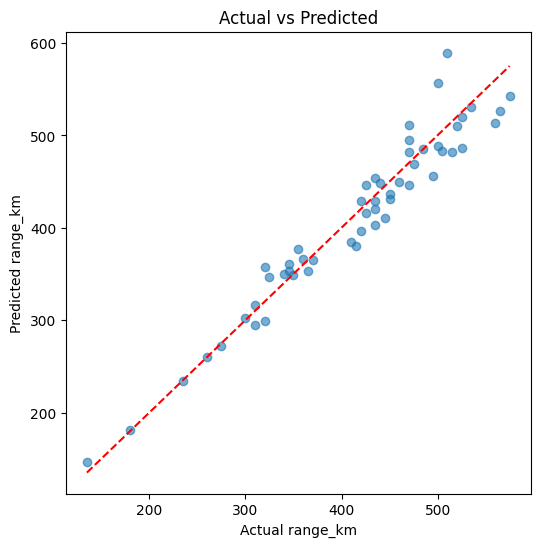

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual range_km")
plt.ylabel("Predicted range_km")
plt.title("Actual vs Predicted")
plt.show()


battery_capacity_kWh    0.410429
usable_battery_kWh      0.332273
efficiency_wh_per_km    0.084498
performance_index       0.077233
top_speed_kmh           0.064878
acceleration_0_100_s    0.018180
torque_nm               0.012509
dtype: float64


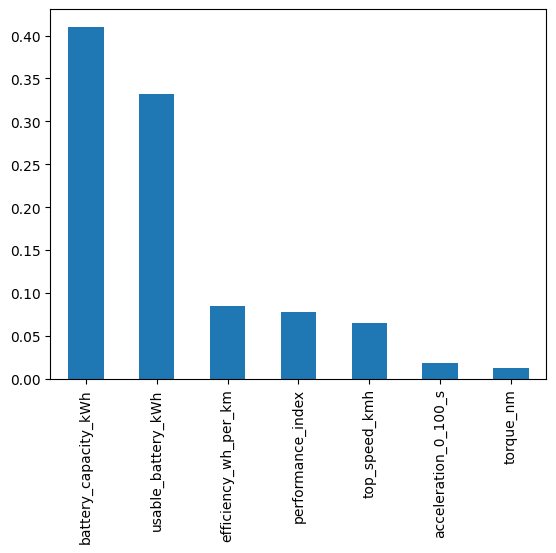

In [14]:
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fi)
fi.plot(kind='bar'); plt.show()


In [15]:
# print(model.feature_names_in_)

In [16]:
# new_data as you defined
new_data = {
  'battery_capacity_kWh': [95],
  'efficiency_wh_per_km': [190],
  'top_speed_kmh': [190],
  'acceleration_0_100_s': [7],
  'torque_nm': [150]
}
new_df = pd.DataFrame(new_data)

# Create the exact engineered columns used in training:
new_df['usable_battery_kWh'] = new_df['battery_capacity_kWh'] * 0.9
new_df['performance_index'] = new_df['top_speed_kmh'] / (new_df['acceleration_0_100_s'] + 0.1)

# Ensure column order and names match the training X's columns:
# Replace this list with the exact list you used when training.
feature_cols = ['battery_capacity_kWh','efficiency_wh_per_km','top_speed_kmh',
                'acceleration_0_100_s','torque_nm','usable_battery_kWh','performance_index']

new_df = new_df[feature_cols]

# Predict
model = best_rf if 'best_rf' in globals() else rf  # whichever you have
pred_range = model.predict(new_df)
print("Predicted range (km):", pred_range[0])


Predicted range (km): 444.3


In [17]:
import joblib
joblib.dump(best_rf if 'best_rf' in locals() else rf, "ev_range_rf_model.pkl")


['ev_range_rf_model.pkl']